# Bike Sharing Demand  Step 1 & 2

## 1. Understanding the competition
- Summary
    + Title : [Bike Sharing Demand](https://www.kaggle.com/competitions/bike-sharing-demand/overview)
    + Mission : Predict the number of bike rentals by using data such as date, season, working day, weather, and temperature
    + Type : **Regression**
    + Evaluation metrics : RMSLE
    

- Description
    + You are provided hourly rental data spanning two years.  
    + For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month.  
    + You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.
    
    
- Data Fields
    + datetime - hourly date + timestamp  
    + season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
    + holiday - whether the day is considered a holiday
    + workingday - whether the day is neither a weekend nor holiday
    + weather
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
        - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
    + temp - temperature in Celsius
    + atemp - "feels like" temperature in Celsius
    + humidity - relative humidity
    + windspeed - wind speed
    + casual - number of non-registered user rentals initiated
    + registered - number of registered user rentals initiated
    + count - number of total rentals# Bike Sharing Demand Step 2

## 2. EDA (Exploratory Data Analysis)

### 2.1.  Exploring the data

In [1]:
# Get data (train data/test data/sample submission data)
import numpy as np
import pandas as pd

data_path = '../../Datasets/bike_sharing_demand/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

In [2]:
# Check data size
train.shape, test.shape

((10886, 12), (6493, 9))

In [3]:
# Check the part of data (train data)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# Check the part of data (test data)
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


---
- Remove features like **'casual'** and **'registered'** (which is existing in train data but not test data)
---

In [5]:
# Check the part of data (sample submission data)
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


---
- Remove **'datetime'** feature (which is ID column for separating data but don't contribute of predicting target value)
---

In [6]:
# Check the number of missing values and data type (train data)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
# Check the number of missing values and data type (test data)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


### 2.2. Feature Engineering for effective visualization

#### 1) Feature 'datetime'
- Difficult to visualize the raw data because of 'datetime' feature
- Split 'datetime' feature and make new features like **'date', 'year', 'month', 'day', 'hour', 'minute', 'second'** and **'weekday'**

In [8]:
# How to split 'datetime'
    # Split to date, time
print(train['datetime'][30].split())
print(train['datetime'][30].split()[0]) # date
print(train['datetime'][30].split()[1]) # time

    # Split to year, month, day
print(train['datetime'][30].split()[0].split('-')[0]) # year
print(train['datetime'][30].split()[0].split('-')[1]) # month
print(train['datetime'][30].split()[0].split('-')[2]) # day

    # Split to hour, minute, second
print(train['datetime'][30].split()[1].split(':')[0]) # hour
print(train['datetime'][30].split()[1].split(':')[1]) # minute
print(train['datetime'][30].split()[1].split(':')[2]) # second

['2011-01-02', '07:00:00']
2011-01-02
07:00:00
2011
01
02
07
00
00


In [9]:
# Make new features (date/year/month/day/hour/minute/second)
train['date'] = train['datetime'].apply(lambda x: x.split()[0])
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2])
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

In [10]:
# How to get weekday from date
    # Import library
from datetime import datetime
import calendar

    # Change datatype from object to datetime
print(train['date'][30])
print(datetime.strptime(train['date'][30], '%Y-%m-%d'))

    # Get weekday (integer)
print(datetime.strptime(train['date'][30], '%Y-%m-%d').weekday())

    # Get weekday (string)
print(calendar.day_name[datetime.strptime(train['date'][30], '%Y-%m-%d').weekday()])

2011-01-02
2011-01-02 00:00:00
6
Sunday


In [11]:
# Make new feature (weekday)
train['weekday'] = train['date'].apply(
    lambda dateStr: 
    calendar.day_name[datetime.strptime(dateStr, '%Y-%m-%d').weekday()])

#### 2) Feature 'season' and 'weather'
- Feature 'season' and 'weather' are composed of numbers
- Difficult to understand the meaning of each number
- Change the number into real meaning

In [12]:
# Map the number into real meaningz
train['season'] = train['season'].map({1: 'Spring',
                                      2: 'Summer',
                                      3: 'Fall',
                                      4: 'Winter'})
train['weather'] = train['weather'].map({1: 'Clear',
                                        2: 'Mist, Few clouds',
                                        3: 'Light Snow, Rain, Thunderstorm',
                                        4: 'Heavy Rain, Thunderstorm, Snow, Fog'})

In [13]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


---
- Remove features with duplicate meanings when training model
    + **'date'** because of 'year'/'month'/'day'
    + **'month'** because of 'season'
---

### 2.3. Data visualization

In [14]:
# Import library
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#### 1) Distribution plot

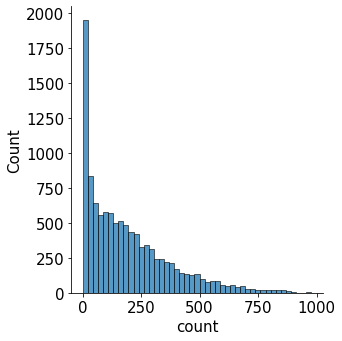

In [15]:
# Distribution plot of target value 'count'
mpl.rc('font', size=15)
sns.displot(train['count']);

---
- Transform target values **'count'**
    - y > log(y)
        + Target values distribution is skewed to the left
        + <u>For a regression model to perform well, the data should be normally distributed</u>
        + Use <u>log transformation</u> to make the left-skewed data close to a normal distribution
    - log(y) > y
        + But the log-transformed target values must be restored by <u>exponential transformation at the end</u>
---

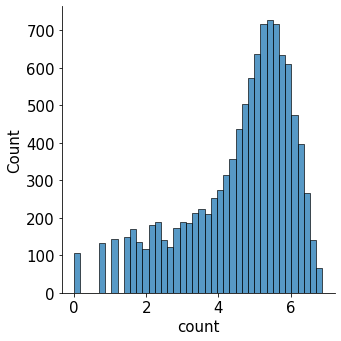

In [16]:
# Visualize the log-transformed target values
sns.displot(np.log(train['count']));

#### 2) Bar plot
- Matplotlib
    + Figure : meaning of the entire subplot in row m and column n
    + Axes : meaning of each subplot
    + [matplotlib.pyplot.tick_params](https://bit.ly/3DBCQaQ)

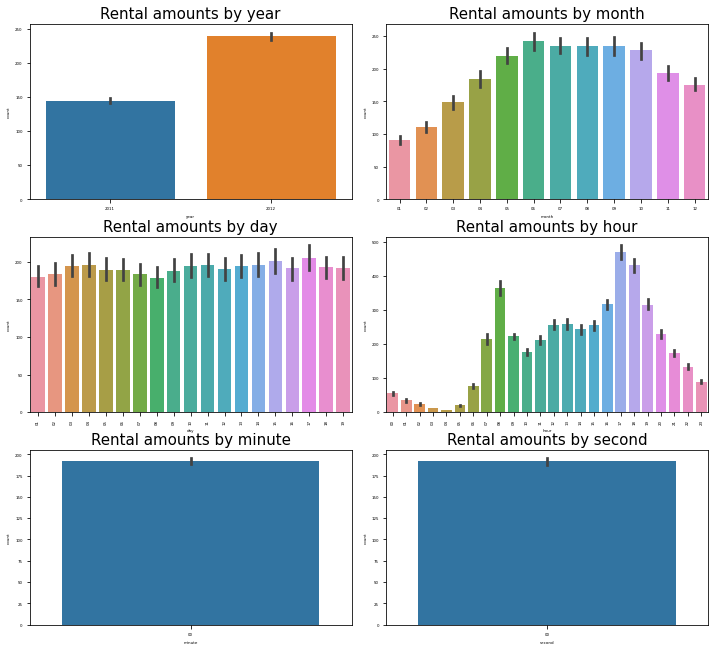

In [17]:
# Bar plots of the average rental amounts by year/month/day/hour/minute/second

# Step 1 : Prepare m x n figure
mpl.rc('font', size=4)                        # Set font size
mpl.rc('axes', titlesize=15)                  # Set title size of each axes
figure, axes = plt.subplots(nrows=3, ncols=2) # Make rows(3) x cols(2) figure
plt.tight_layout()                            # Add space between graphs
figure.set_size_inches(10, 9)                 # Set figure size width(10) x height(9)

# Step 2 : Allocate subplots to each axes
sns.barplot(x='year', y='count', data=train, ax=axes[0, 0])
sns.barplot(x='month', y='count', data=train, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=train, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1, 1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2, 0])
sns.barplot(x='second', y='count', data=train, ax=axes[2, 1])

# Step 3 : Set details
    # Add title
axes[0, 0].set(title='Rental amounts by year')
axes[0, 1].set(title='Rental amounts by month')
axes[1, 0].set(title='Rental amounts by day')
axes[1, 1].set(title='Rental amounts by hour')
axes[2, 0].set(title='Rental amounts by minute')
axes[2, 1].set(title='Rental amounts by second')
    # Rotate labels of x axis
axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

---
- Remove **'day', 'minute', 'second'** feature
    + year : 2011 amounts < 2012 amounts
    + month : Most amounts in June, Least mounts in January
    + day : No common values between train data and test data  
        - <u>To use 'day' column for feature, there should common values between train and test set</u>
    + hour : Most amounts at 8 am and 5-6 pm
    + minute : No information in this column
    + second : No information in this column
---

#### 4) Box plot

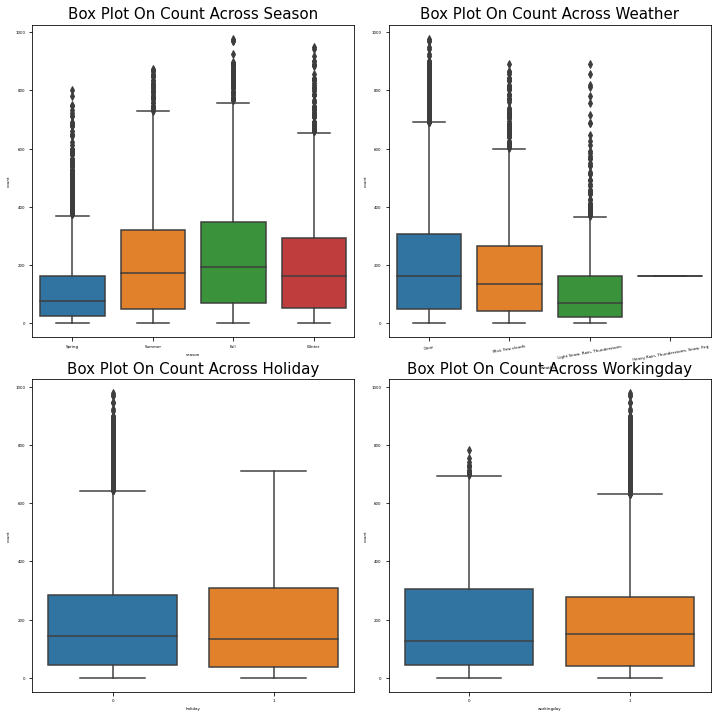

In [18]:
# Box plots on count across season/weather/holiday/working day

# Step 1 : Prepare m x n figure
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(10, 10)

# Step 2 : Allocate subplots to each axes
sns.boxplot(x='season', y='count', data=train, ax=axes[0,0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0,1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1,0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1,1])

# Step 3 : Set details
axes[0, 0].set(title='Box Plot On Count Across Season')
axes[0, 1].set(title='Box Plot On Count Across Weather')
axes[1, 0].set(title='Box Plot On Count Across Holiday')
axes[1, 1].set(title='Box Plot On Count Across Workingday')

axes[0, 1].tick_params(axis='x', labelrotation=10)

---
- Understanding graphs
    + Not in holiday, many outliers
    + In workingday, many outliers
---

#### 5) Point plot

<AxesSubplot:xlabel='hour', ylabel='count'>

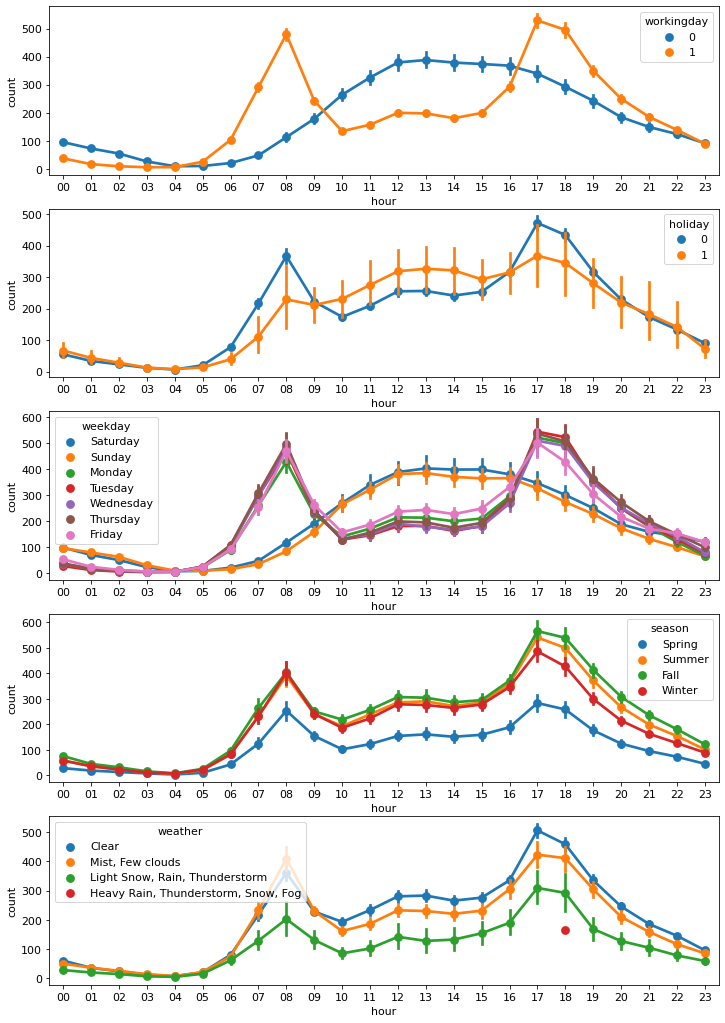

In [19]:
# Point plot of average rental amounts per hour according to workingday/holiday/weekday/season/weather

# Step 1 : Prepare m x n figure
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5)
figure.set_size_inches(12, 18)

# Step 2 : Allocate subplots to each axes
sns.pointplot(x='hour', y='count', hue='workingday', data=train, ax=axes[0])
sns.pointplot(x='hour', y='count', hue='holiday', data=train, ax=axes[1])
sns.pointplot(x='hour', y='count', hue='weekday', data=train, ax=axes[2])
sns.pointplot(x='hour', y='count', hue='season', data=train, ax=axes[3])
sns.pointplot(x='hour', y='count', hue='weather', data=train, ax=axes[4])

---
- Understanding graphs
    + Workingday/Holiday/Weekday
        - Lots of rentals during commuting time on workingday
        - Lots of rentals at 12-2pm on days off
    + Season
        - Most in autumn and least in spring
    + Weather
        - Lots of rentals when good weather
        - **Delete outlier data whose weather is 4**(heavy snow, rain, thunder)
---

#### 6) Scatter plot with regression line
- Identify correlations between numeric data
- Parameters
    + scatter_kws={'alpha': 0.2} : Set the opacity of points
    + line_kws={'color': blue} : Set the color of regression line

<AxesSubplot:xlabel='humidity', ylabel='count'>

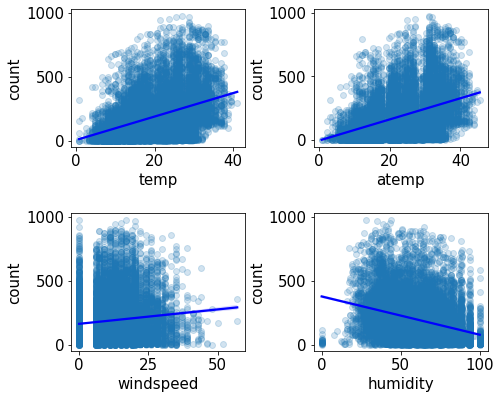

In [20]:
# Scatter plot of rental amounts by temp/atemp/windspeed/humidity

# Step 1 : Prepare m x n figure
mpl.rc('font', size=15)
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(7, 6)

# Step 2 : Allocate subplots to each axes
sns.regplot(x='temp', y='count', data=train, ax=axes[0, 0],
           scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='atemp', y='count', data=train, ax=axes[0, 1],
           scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1, 0],
           scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1, 1],
           scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})

---
- Understanding graphs
    + temp : Higher temperature, more rental
    + atemp : Higher temperature, more rental
    + humidity : Lower humidity, more rental
    + windspeed
        - Higher windspeed, more rental?
        - Too many 0 values most likely to have been recorded due to an error
        - Hard to identify correlation between windspeed and rentals because of missing values
        - Remove **'windspeed'** feature
---

#### 7) Heatmap
- Identify correlations between numeric data and visualize with heatmap
- Numeric data : temp, atemp, humidity, windspeed, count

In [21]:
# Correlation between numeric data
train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


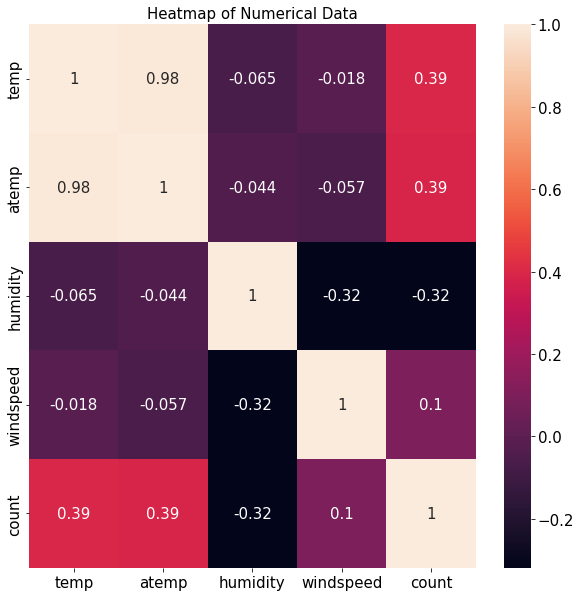

In [22]:
# Correlation Matrix
corrMat = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

# Heatmap of correlations between numeric data
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(corrMat, annot=True) # annot=True : Display correlation coefficient
ax.set(title='Heatmap of Numerical Data');

---
- Understanding graphs
    + temp : Positive (Higher temperature, more rental)
    + atemp : Positive (Higher temperature, more rental)
    + humidity : Negative (Lower humidity, more rental)
    + windspeed
        - Positive but weak correlation
        - Remove **'windspeed'** feature
---

### 2.4. Analysis summary and modeling strategy


#### 1) Analysis summary
1. Transform target values
- before training : 'count' > log(count)
- after training : log(count) > 'count'
2. Add derived features
- 'year', 'month', 'day', 'hour', 'minute', 'second'
- 'weekday'
3. Remove features
- 'casual', 'registered'
- 'datetime'
- 'date', 'month'
- 'day', 'minute', 'second'
- 'windspeed'
4. Delete outliers
- Data whose 'weather' value is 4

#### 2) Modeling strategy
- Baseline model : LinearRegression
- Performance improvement : Lidge, Lasso, RandomForest
    + Feature engineering : Same apply for each model
    + Hyperparameter optimization : GridSearch
- Etc
    + Target value is log(count) not count

References
===
- [EDA reference](https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile)
- [Modeling reference](https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile)
- 머신러닝.딥러닝 문제해결 전략(신백균)